# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt # for visualization
import pandas as pd
import seaborn as sns # a visualization library built on top of matplotlib to create prettier and more informative plots.

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2531896665145178616
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5668601856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13083702359792519340
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


✅ TensorFlow is correctly detecting your dedicated NVIDIA GeForce RTX 4070 Laptop GPU as /device:GPU:0.

So even though I have two GPUs (likely integrated Intel + dedicated NVIDIA), TensorFlow is only using the NVIDIA one — which is exactly what you want for training.




## Data Preprocessing

### Training Image preprocessing

 Below one pasted from keras documentation

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory( #keras is a part of tensorflow
    'train', # i/p directory name
    labels="inferred", 
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
!nvidia-smi

Sun Jul  6 17:47:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P0             17W /  140W |    7229MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

To avoid overfitting we are dropping random neurons

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 102s 43ms/step - loss: 1.3723 - accuracy: 0.5962 - val_loss: 0.4983 - val_accuracy: 0.8420
Epoch 2/10
2197/2197 [==============================] - 99s 45ms/step - loss: 0.4411 - accuracy: 0.8612 - val_loss: 0.3758 - val_accuracy: 0.8791
Epoch 3/10
2197/2197 [==============================] - 100s 45ms/step - loss: 0.2709 - accuracy: 0.9124 - val_loss: 0.3488 - val_accuracy: 0.8862
Epoch 4/10
2197/2197 [==============================] - 100s 45ms/step - loss: 0.1824 - accuracy: 0.9414 - val_loss: 0.3270 - val_accuracy: 0.9010
Epoch 5/10
2197/2197 [==============================] - 100s 45ms/step - loss: 0.1405 - accuracy: 0.9536 - val_loss: 0.1651 - val_accuracy: 0.9465
Epoch 6/10
2197/2197 [==============================] - 100s 45ms/step - loss: 0.1066 - accuracy: 0.9654 - val_loss: 0.1464 - val_accuracy: 0.9530
Epoch 7/10
2197/2197 [==============================] - 102s 47ms/step - loss: 0.0888 - accuracy: 0.9703 - val_loss: 0.

## Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 41s 19ms/step - loss: 0.0256 - accuracy: 0.9919
Training accuracy: 0.9918628931045532


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 10s 18ms/step - loss: 0.1077 - accuracy: 0.9660
Validation accuracy: 0.9660254716873169


### Saving Model

size is less in keras than h5

In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'loss': [1.3722691535949707,
  0.4411105811595917,
  0.27087610960006714,
  0.18241249024868011,
  0.140513077378273,
  0.10656356811523438,
  0.08878099173307419,
  0.0737883523106575,
  0.06473453342914581,
  0.055919867008924484],
 'accuracy': [0.596159040927887,
  0.8612276911735535,
  0.9124404191970825,
  0.941432535648346,
  0.9535670876502991,
  0.9653744697570801,
  0.9702966213226318,
  0.9760722517967224,
  0.978888988494873,
  0.982032835483551],
 'val_loss': [0.4983258545398712,
  0.37578722834587097,
  0.34877729415893555,
  0.3269958794116974,
  0.16511312127113342,
  0.14642781019210815,
  0.19391466677188873,
  0.12094788253307343,
  0.14171947538852692,
  0.1076689288020134],
 'val_accuracy': [0.8420214056968689,
  0.8791258931159973,
  0.8862394690513611,
  0.9009788036346436,
  0.9465057849884033,
  0.9529933929443359,
  0.9424083828926086,
  0.9635215401649475,
  0.9578306674957275,
  0.9660254716873169]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

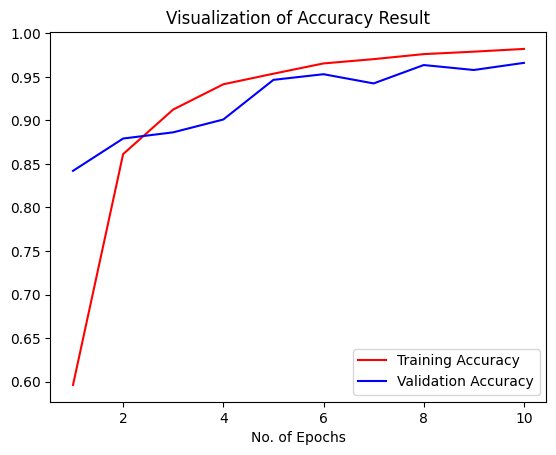

In [ ]:
epochs = [i for i in range(1,11)] # iterates for 10 times as 10 epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

passing images from validation set because, the test images are given randomly without diectories, so we can't use them right now

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False, # WHILE TRAINING it was shuffled, but for testing we will pass sequentially fromvalidation set
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set) # it gives prob of all 38 classes (using softmax activation) and then we need to find in which class it belongs to (taking the one with highest prob)
predicted_categories = tf.argmax(y_pred, axis=1) #it will extractthe maximum value from y_pred and will return that and return in vertical using axis = 1

17572/17572 [==============================] - 27s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0) #simply iterate bcuz we gave testset sequentially
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

classification_report(true label, predicted label, target name - (to display class name))

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

### Confusion Matrix Visualization

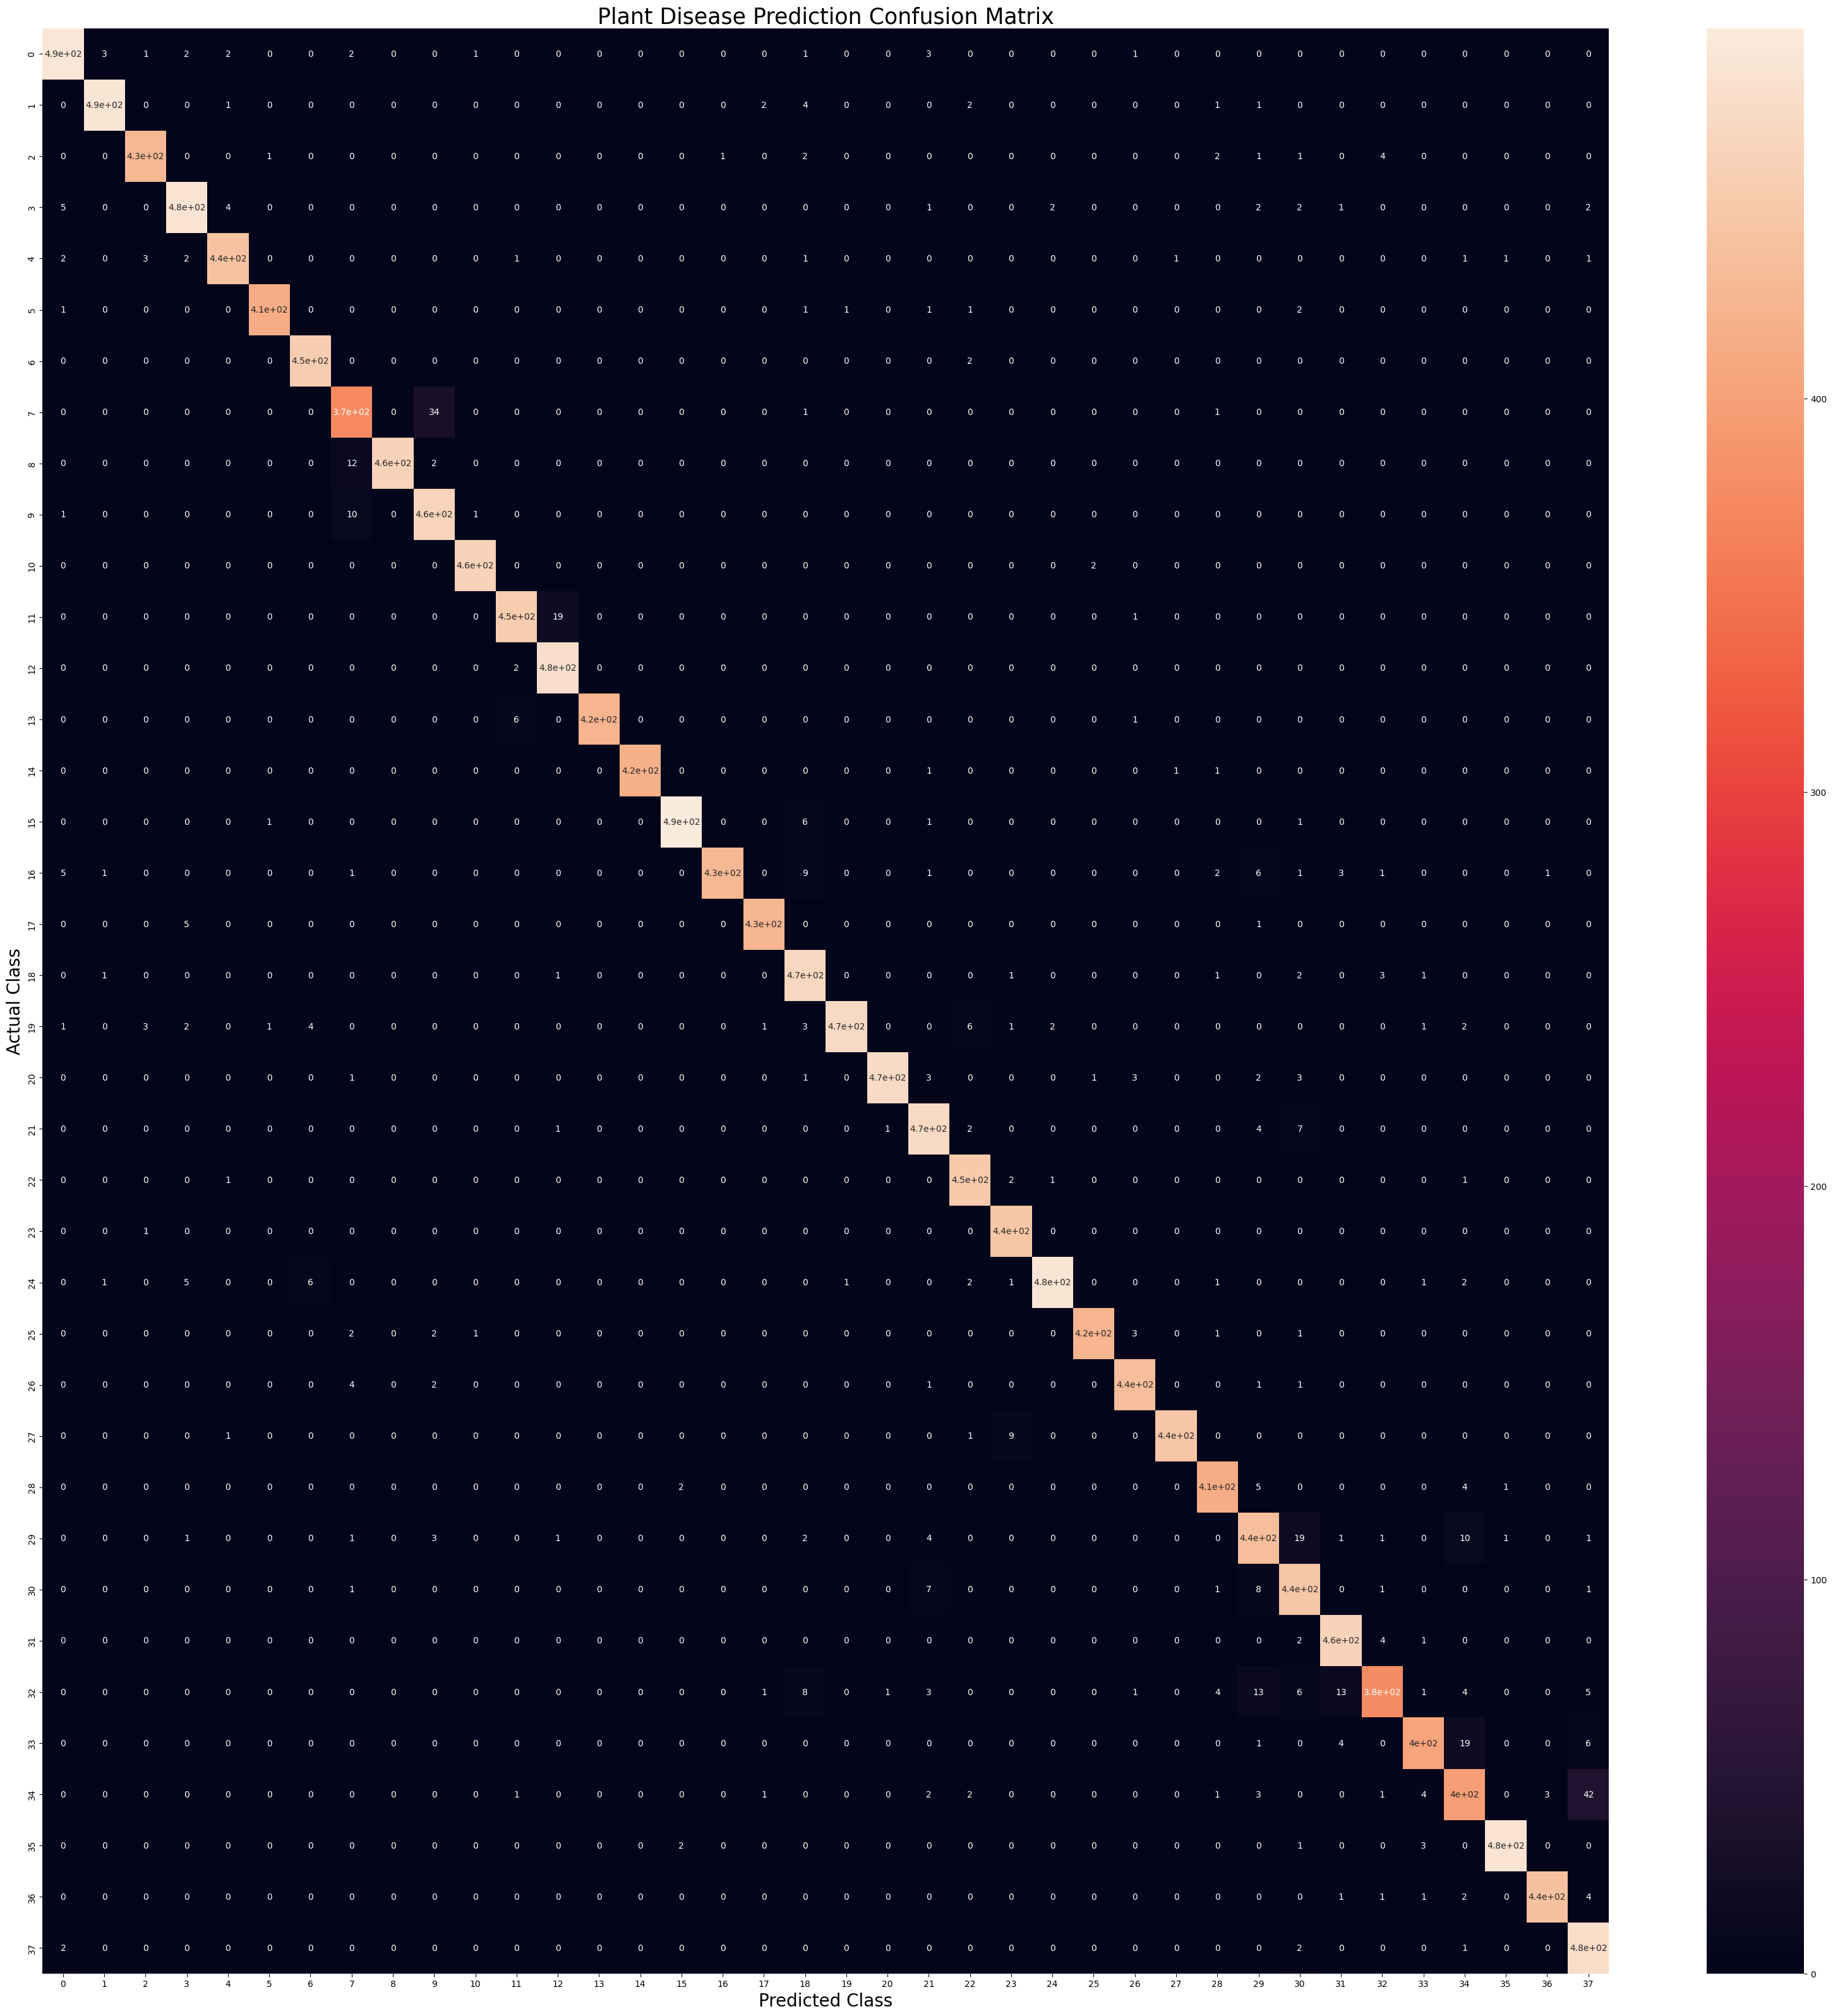

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}) # annot=True => tells how much value are actually true

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()